In [1]:
# Importando bibliotecas necessarias
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score


In [ ]:
# Carregar modelo do Spacy para processamento de texto em inglês
!python -m spacy download en_core_web_md
nlp_pt = spacy.load('en_core_web_md')



In [3]:
# Função para pré-processar o texto
def remove_stop_and_punct_lemma(text, remove_punct=True):
    doc = nlp_pt(text.lower())
    tokens = []

    for token in doc:
        # Caso não seja um stopword ou uma pontuação
        if token.is_stop or (token.is_punct and remove_punct):
            continue
        tokens.append(token.lemma_)

    return ' '.join(tokens)

In [4]:
# Carregando dataset
dados = pd.read_csv('data.csv', encoding='ISO-8859-1')


In [ ]:
dados.head()

In [6]:
# Aplicando pré-processamento
dados['texto_preprocessado'] = dados['Form_Sentence'].apply(remove_stop_and_punct_lemma)

In [7]:
# Representação usando TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dados['texto_preprocessado'])

In [8]:
# Redução de Dimensionalidade
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

In [9]:
# Encontrando o número ótimo de clusters
sil_scores = []
clusters_range = range(2, 10)

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels)
    sil_scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

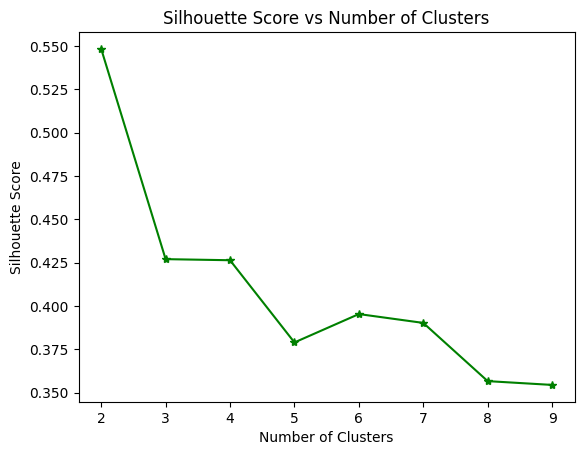

In [10]:
# Plotando o Silhouette Score para diferentes números de clusters
plt.plot(clusters_range, sil_scores, 'g*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [11]:
# Escolhendo o número ótimo de clusters baseado na visualização e aplicando KMeans
optimal_clusters = clusters_range[sil_scores.index(max(sil_scores))]
kmeans = KMeans(n_clusters=optimal_clusters)
labels = kmeans.fit_predict(X_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


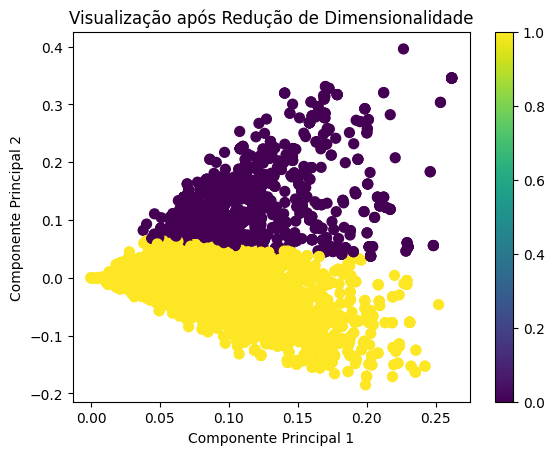

In [12]:
# Visualizando os clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Visualização após Redução de Dimensionalidade")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


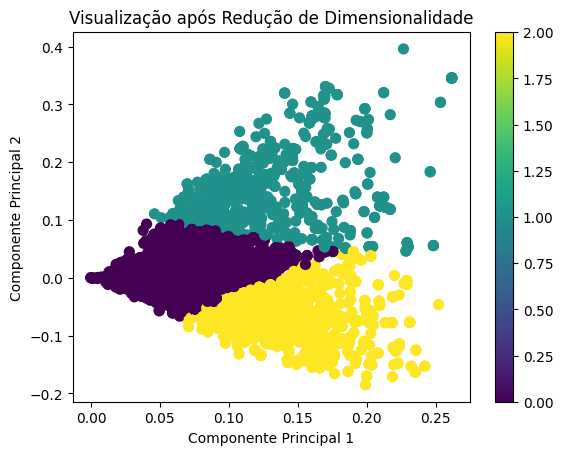

In [16]:
# Visualizando 3 clusters
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Visualização após Redução de Dimensionalidade")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


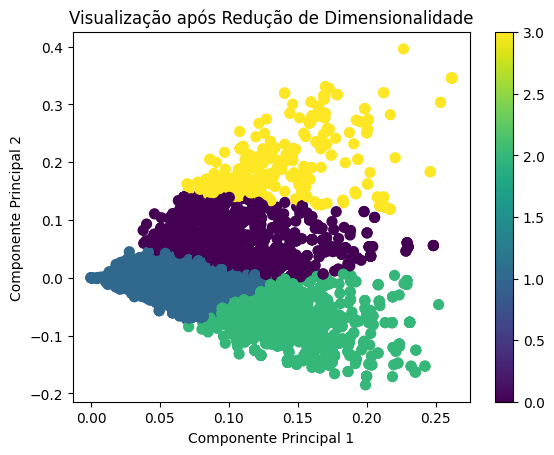

In [17]:
# Visualizando 4 clusters
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Visualização após Redução de Dimensionalidade")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar()
plt.show()

In [14]:
# ------- TAREFA DE CLASSIFICAÇÃO: Prever Is_Unit_Ambiguous -------

# Convertendo a coluna booleana para inteiro (0 ou 1)
dados['Is_Unit_Ambiguous'] = dados['Is_Unit_Ambiguous'].astype(int)

# Dividir dados em treino e teste para a tarefa de classificação
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X.toarray(), dados['Is_Unit_Ambiguous'], test_size=0.3, random_state=42)

# Treinando um modelo de regressão logística
clf = LogisticRegression(max_iter=1000).fit(X_train_class, y_train_class)
y_pred_class = clf.predict(X_test_class)

# Avaliando o modelo de classificação
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Acurácia para a Classificação: {accuracy:.2f}")
print(classification_report(y_test_class, y_pred_class))

Acurácia para a Classificação: 0.90
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1526
           1       0.87      0.07      0.13       188

    accuracy                           0.90      1714
   macro avg       0.88      0.53      0.54      1714
weighted avg       0.89      0.90      0.86      1714



# ***Ao avaliar o modelo de classificação, a acurácia de 90% sugere bom desempenho. No entanto, o relatório de classificação revela um problema: enquanto quase todos os casos "não ambíguos" foram identificados, apenas 7% dos casos "ambíguos" foram corretamente previstos. Isso sugere que, apesar da alta acurácia, o modelo tem dificuldade em identificar a classe minoritária em um conjunto de dados desequilibrado.***

# ***O uso das curvas ROC e PR é justificado exatamente por isso: enquanto a curva ROC avalia a capacidade do modelo de discriminar entre as classes em diferentes limiares, a curva PR foca especificamente no desempenho da classe positiva (ou minoritária) em datasets desequilibrados. Assim, essas curvas oferecem insights mais profundos sobre o verdadeiro desempenho do modelo.***

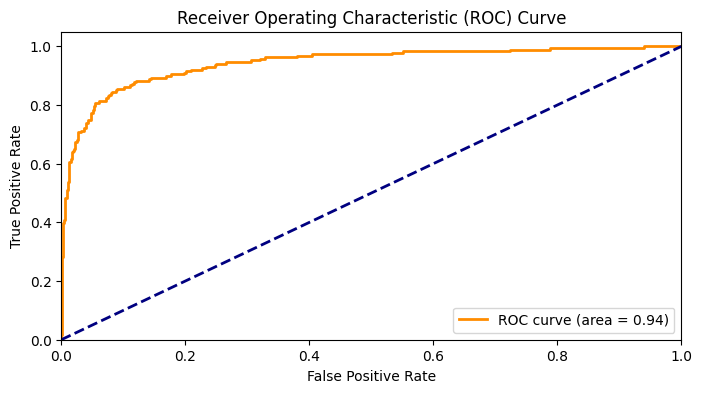

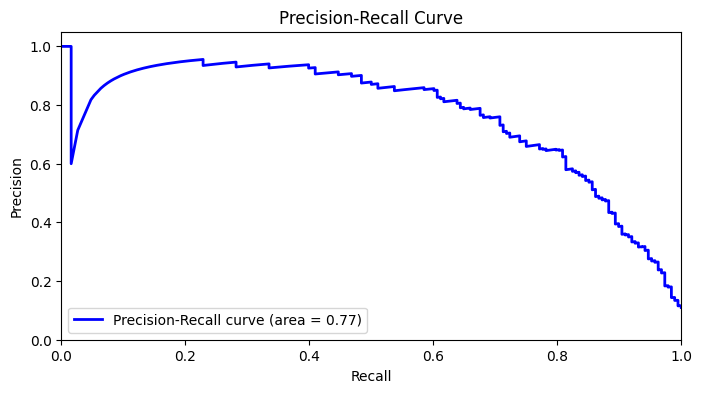

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Probabilidades previstas para a classe 1
y_probs = clf.predict_proba(X_test_class)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_class, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# PR Curve
precision, recall, _ = precision_recall_curve(y_test_class, y_probs)
average_precision = average_precision_score(y_test_class, y_probs)

plt.figure(figsize=(8, 4))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
